# Model `CMF`

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
import numpy as np
import time
import logging
import scipy.sparse

In [3]:
from datasets import MovieLensGenreCastUserData

data = MovieLensGenreCastUserData(size="1m")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.Xs

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (6040, 3706)
[I]   sampling to  : (300, 3706)
[I] Sampling axis 0 with given indices
[I]   sampling from: (6040, 82)
[I]   sampling to  : (300, 82)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 3706)
[I]   sampling to  : (300, 500)
[I] Sampling axis 1 with given indices
[I]   sampling from: (41, 3706)
[I]   sampling to  : (41, 500)
[I] Sampling axis 1 with given indices
[I]   sampling from: (9488, 3706)
[I]   sampling to  : (9488, 500)


[<300x500 sparse matrix of type '<class 'numpy.int32'>'
 	with 7741 stored elements in Compressed Sparse Row format>,
 <300x82 sparse matrix of type '<class 'numpy.float64'>'
 	with 1124 stored elements in Compressed Sparse Row format>,
 <41x500 sparse matrix of type '<class 'numpy.float64'>'
 	with 1200 stored elements in Compressed Sparse Row format>,
 <9488x500 sparse matrix of type '<class 'numpy.float64'>'
 	with 2504 stored elements in Compressed Sparse Row format>]

In [4]:
from datasets import RatioSplit, NoSplit

s0 = RatioSplit(X=data.Xs[0], val_size=0.1, test_size=0.2, seed=1997)
s0.negative_sample(
    train_size=s0.pos_train_size, 
    val_size=s0.pos_val_size, 
    test_size=s0.pos_test_size, 
    seed=2023, type='popularity')

s1 = NoSplit(X=data.Xs[1])
s2 = NoSplit(X=data.Xs[2])

# s1 = RatioSplit(X=data.Xs[1], val_size=0.1, test_size=0.2, seed=1997)
# s1.negative_sample(
#     train_size=s1.pos_train_size, 
#     val_size=s1.pos_val_size, 
#     test_size=s1.pos_test_size, 
#     seed=2023, type='popularity')

# s2 = RatioSplit(X=data.Xs[2], val_size=0.1, test_size=0.2, seed=1997)
# s2.negative_sample(
#     train_size=s2.pos_train_size, 
#     val_size=s2.pos_val_size, 
#     test_size=s2.pos_test_size, 
#     seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 5417
[I]   val_size     : 775
[I]   test_size    : 1549
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 142259
[I]   n_negatives  : 7741
[I]   train_size   : 5417
[I]   val_size     : 775
[I]   test_size    : 1549
[I]   seed         : 2023
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719052812
[I]   train_size   : 1124
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719052812
[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1719052812
[I]   train_size   : 1200
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1719052812


In [5]:
Xs_train = [s0.X_train, s1.X_train, s2.X_train]
Xs_val = [s0.X_val, s1.X_val, s2.X_val]
Xs_test = [s0.X_test, s1.X_test, s2.X_test]

# `CMF`

[I] k            : 5
[I] alpha        : 3
[I] Us           : None
[I] Ws           : mask
[I] link         : 3
[I] lr           : 0.1
[I] reg          : 0.1
[I] tol          : 0.0
[I] max_iter     : 50
[I] init_method  : normal
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : prediction
None
None


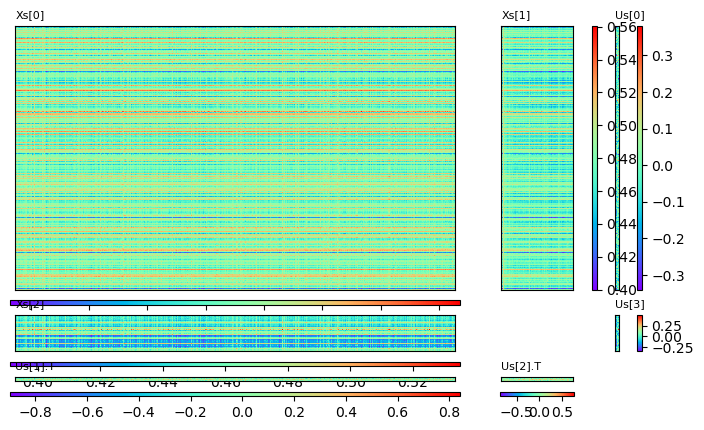

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


<Figure size 640x480 with 0 Axes>

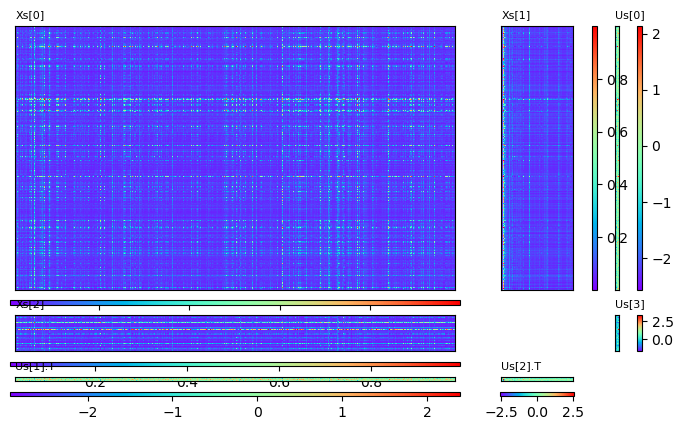

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


<Figure size 640x480 with 0 Axes>

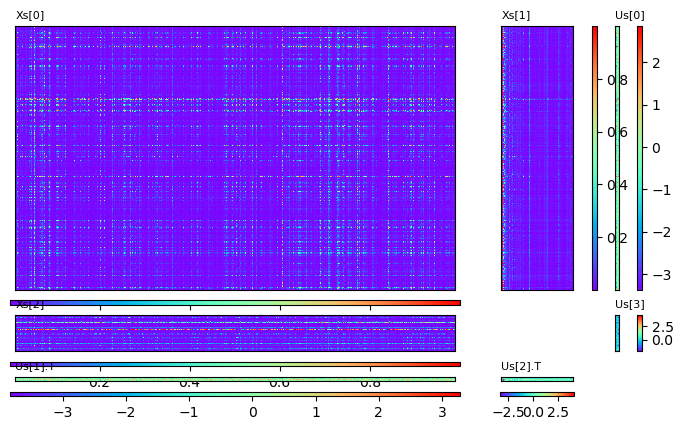

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


<Figure size 640x480 with 0 Axes>

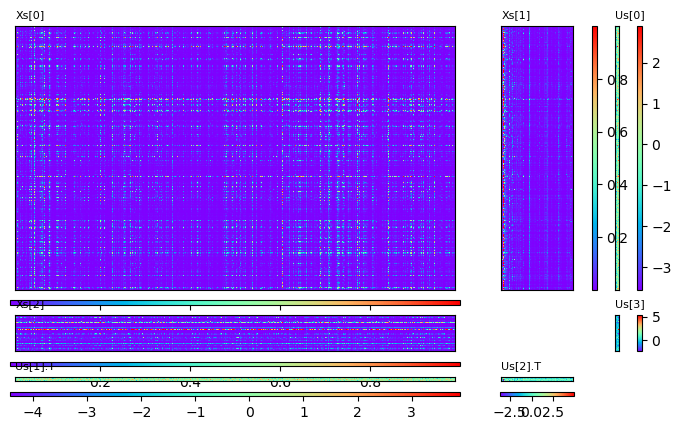

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


<Figure size 640x480 with 0 Axes>

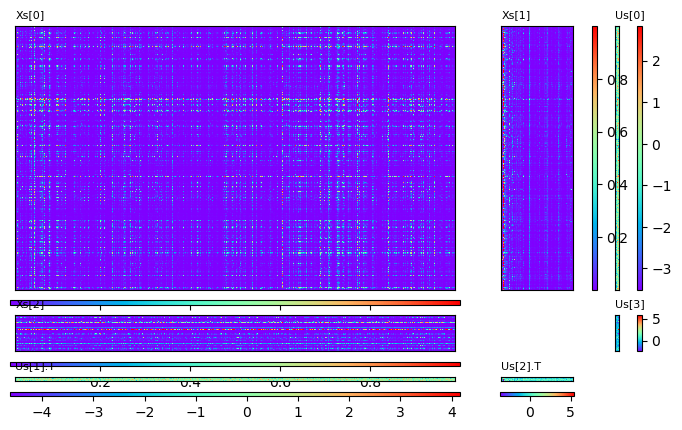

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


<Figure size 640x480 with 0 Axes>

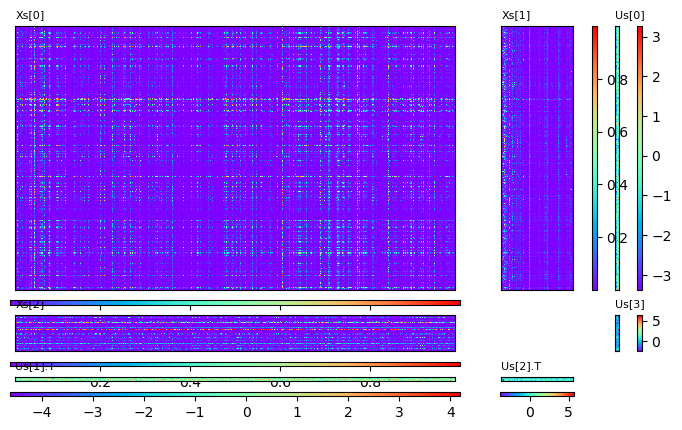

None
[W] Stopped in advance: Reach maximum iteration


<Figure size 640x480 with 0 Axes>

In [6]:
from models import CMF

k = 5
alpha = [0.33, 0.33, 0.33]
Ws = 'mask'
link = ['logistic', 'logistic', 'logistic']
lr = 0.1
reg = 0.1
tol = 0.0
max_iter = 50
init_method = 'normal'
seed = 2024

factors = [[0, 1], [0, 2], [3, 1]]

model = CMF(k=k, alpha=alpha, Ws=Ws, link=link, lr=lr, reg=reg, tol=tol, max_iter=max_iter, init_method=init_method, seed=seed)
model.fit(Xs_train=Xs_train, factors=factors, Xs_val=Xs_val, Xs_test=Xs_test, task='prediction', verbose=False, display=False)

In [7]:
model.logs['updates']

train  \
                                                                       0   
                 time iter        error    rec_error reg_error      RMSE   
0   22/06/24 06:40:19    0  1095.264085  1094.306349  0.957736  0.516944   
1   22/06/24 06:40:21    1  1128.273891  1126.787828  1.486063  0.575913   
2   22/06/24 06:40:21    2  1172.711796  1170.846957  1.864839  0.621419   
3   22/06/24 06:40:22    3  1216.881221  1214.713475  2.167746  0.654678   
4   22/06/24 06:40:22    4  1257.845360  1255.422308  2.423052  0.679305   
5   22/06/24 06:40:22    5  1294.668974  1292.023717  2.645257  0.697944   
6   22/06/24 06:40:22    6  1326.833698  1323.990614  2.843084  0.712208   
7   22/06/24 06:40:23    7  1354.192309  1351.170235  3.022074  0.723148   
8   22/06/24 06:40:23    8  1376.894838  1373.708963  3.185875  0.731503   
9   22/06/24 06:40:23    9  1395.279167  1391.942195  3.336972  0.737819   
10  22/06/24 06:40:23   10  1409.780980  1406.303875  3.477106  0.742513   
11  22/06/24 06:40:25   11  1420.871801  1417.264277  3.607525  0.745914   
12  22/06/24 06:40:25   12  1429.019622  1425.290475  3.729147  0.748281   
13  22/06/24 06:40:25   13  1434.665846  1430.823181  3.842665  0.749824   
14  22/06/24 06:40:26   14  1438.213440  1434.264822  3.948617  0.750714   
15  22/06/24 06:40:26   15  1440.022324  1435.974884  4.047440  0.751090   
16  22/06/24 06:40:26   16  1440.409075  1436.269573  4.139502  0.751067   
17  22/06/24 06:40:26   17  1439.648983  1435.423851  4.225131  0.750738   
18  22/06/24 06:40:27   18  1437.979280  1433.674648  4.304632  0.750179   
19  22/06/24 06:40:27   19  1435.602836  1431.224542  4.378294  0.749453   
20  22/06/24 06:40:27   20  1432.691888  1428.245483  4.446405  0.748610   
21  22/06/24 06:40:29   21  1429.391550  1424.882303  4.509248  0.747691   
22  22/06/24 06:40:29   22  1425.823015  1421.255908  4.567107  0.746727   
23  22/06/24 06:40:29   23  1422.086425  1417.466157  4.620268  0.745744   
24  22/06/24 06:40:30   24  1418.263483  1413.594469  4.669014  0.744762   
25  22/06/24 06:40:30   25  1414.419835  1409.706206  4.713629  0.743796   
26  22/06/24 06:40:30   26  1410.607269  1405.852875  4.754394  0.742857   
27  22/06/24 06:40:31   27  1406.865736  1402.074151  4.791585  0.741952   
28  22/06/24 06:40:31   28  1403.225205  1398.399734  4.825471  0.741088   
29  22/06/24 06:40:31   29  1399.707347  1394.851036  4.856311  0.740267   
30  22/06/24 06:40:31   30  1396.327042  1391.442686  4.884356  0.739492   
31  22/06/24 06:40:33   31  1393.093690  1388.183848  4.909842  0.738763   
32  22/06/24 06:40:33   32  1390.012354  1385.079360  4.932994  0.738080   
33  22/06/24 06:40:33   33  1387.084706  1382.130685  4.954021  0.737442   
34  22/06/24 06:40:34   34  1384.309827  1379.336709  4.973118  0.736847   
35  22/06/24 06:40:34   35  1381.684852  1376.694388  4.990464  0.736295   
36  22/06/24 06:40:34   36  1379.205499  1374.199274  5.006225  0.735783   
37  22/06/24 06:40:35   37  1376.866483  1371.845932  5.020551  0.735309   
38  22/06/24 06:40:35   38  1374.661854  1369.628275  5.033579  0.734872   
39  22/06/24 06:40:35   39  1372.585255  1367.539820  5.045435  0.734468   
40  22/06/24 06:40:35   40  1370.630119  1365.573889  5.056230  0.734096   
41  22/06/24 06:40:37   41  1368.789827  1363.723762  5.066065  0.733754   
42  22/06/24 06:40:37   42  1367.057818  1361.982786  5.075032  0.733440   
43  22/06/24 06:40:38   43  1365.427676  1360.344464  5.083211  0.733152   
44  22/06/24 06:40:38   44  1363.893184  1358.802507  5.090677  0.732889   
45  22/06/24 06:40:38   45  1362.448369  1357.350875  5.097494  0.732648   
46  22/06/24 06:40:39   46  1361.087527  1355.983806  5.103721  0.732429   
47  22/06/24 06:40:39   47  1359.805236  1354.695826  5.109410  0.732229   
48  22/06/24 06:40:39   48  1358.596367  1353.481758  5.114609  0.732048   
49  22/06/24 06:40:40   49  1357.456080  1352.336720  5.119360  0.731884   
50  22/06/24 06:40:40   50  1356.379824

In [8]:
model.logs['updates']

train  \
                                                                       0   
                 time iter        error    rec_error reg_error      RMSE   
0   22/06/24 06:40:19    0  1095.264085  1094.306349  0.957736  0.516944   
1   22/06/24 06:40:21    1  1128.273891  1126.787828  1.486063  0.575913   
2   22/06/24 06:40:21    2  1172.711796  1170.846957  1.864839  0.621419   
3   22/06/24 06:40:22    3  1216.881221  1214.713475  2.167746  0.654678   
4   22/06/24 06:40:22    4  1257.845360  1255.422308  2.423052  0.679305   
5   22/06/24 06:40:22    5  1294.668974  1292.023717  2.645257  0.697944   
6   22/06/24 06:40:22    6  1326.833698  1323.990614  2.843084  0.712208   
7   22/06/24 06:40:23    7  1354.192309  1351.170235  3.022074  0.723148   
8   22/06/24 06:40:23    8  1376.894838  1373.708963  3.185875  0.731503   
9   22/06/24 06:40:23    9  1395.279167  1391.942195  3.336972  0.737819   
10  22/06/24 06:40:23   10  1409.780980  1406.303875  3.477106  0.742513   
11  22/06/24 06:40:25   11  1420.871801  1417.264277  3.607525  0.745914   
12  22/06/24 06:40:25   12  1429.019622  1425.290475  3.729147  0.748281   
13  22/06/24 06:40:25   13  1434.665846  1430.823181  3.842665  0.749824   
14  22/06/24 06:40:26   14  1438.213440  1434.264822  3.948617  0.750714   
15  22/06/24 06:40:26   15  1440.022324  1435.974884  4.047440  0.751090   
16  22/06/24 06:40:26   16  1440.409075  1436.269573  4.139502  0.751067   
17  22/06/24 06:40:26   17  1439.648983  1435.423851  4.225131  0.750738   
18  22/06/24 06:40:27   18  1437.979280  1433.674648  4.304632  0.750179   
19  22/06/24 06:40:27   19  1435.602836  1431.224542  4.378294  0.749453   
20  22/06/24 06:40:27   20  1432.691888  1428.245483  4.446405  0.748610   
21  22/06/24 06:40:29   21  1429.391550  1424.882303  4.509248  0.747691   
22  22/06/24 06:40:29   22  1425.823015  1421.255908  4.567107  0.746727   
23  22/06/24 06:40:29   23  1422.086425  1417.466157  4.620268  0.745744   
24  22/06/24 06:40:30   24  1418.263483  1413.594469  4.669014  0.744762   
25  22/06/24 06:40:30   25  1414.419835  1409.706206  4.713629  0.743796   
26  22/06/24 06:40:30   26  1410.607269  1405.852875  4.754394  0.742857   
27  22/06/24 06:40:31   27  1406.865736  1402.074151  4.791585  0.741952   
28  22/06/24 06:40:31   28  1403.225205  1398.399734  4.825471  0.741088   
29  22/06/24 06:40:31   29  1399.707347  1394.851036  4.856311  0.740267   
30  22/06/24 06:40:31   30  1396.327042  1391.442686  4.884356  0.739492   
31  22/06/24 06:40:33   31  1393.093690  1388.183848  4.909842  0.738763   
32  22/06/24 06:40:33   32  1390.012354  1385.079360  4.932994  0.738080   
33  22/06/24 06:40:33   33  1387.084706  1382.130685  4.954021  0.737442   
34  22/06/24 06:40:34   34  1384.309827  1379.336709  4.973118  0.736847   
35  22/06/24 06:40:34   35  1381.684852  1376.694388  4.990464  0.736295   
36  22/06/24 06:40:34   36  1379.205499  1374.199274  5.006225  0.735783   
37  22/06/24 06:40:35   37  1376.866483  1371.845932  5.020551  0.735309   
38  22/06/24 06:40:35   38  1374.661854  1369.628275  5.033579  0.734872   
39  22/06/24 06:40:35   39  1372.585255  1367.539820  5.045435  0.734468   
40  22/06/24 06:40:35   40  1370.630119  1365.573889  5.056230  0.734096   
41  22/06/24 06:40:37   41  1368.789827  1363.723762  5.066065  0.733754   
42  22/06/24 06:40:37   42  1367.057818  1361.982786  5.075032  0.733440   
43  22/06/24 06:40:38   43  1365.427676  1360.344464  5.083211  0.733152   
44  22/06/24 06:40:38   44  1363.893184  1358.802507  5.090677  0.732889   
45  22/06/24 06:40:38   45  1362.448369  1357.350875  5.097494  0.732648   
46  22/06/24 06:40:39   46  1361.087527  1355.983806  5.103721  0.732429   
47  22/06/24 06:40:39   47  1359.805236  1354.695826  5.109410  0.732229   
48  22/06/24 06:40:39   48  1358.596367  1353.481758  5.114609  0.732048   
49  22/06/24 06:40:40   49  1357.456080  1352.336720  5.119360  0.731884   
50  22/06/24 06:40:40   50  1356.379824

# `CMF` for single matrix

[I] k            : 5
[I] alpha        : 1
[I] Us           : None
[I] Ws           : mask
[I] link         : 3
[I] lr           : 0.1
[I] reg          : 0.1
[I] tol          : 0.0
[I] max_iter     : 50
[I] init_method  : normal
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : prediction
None
None


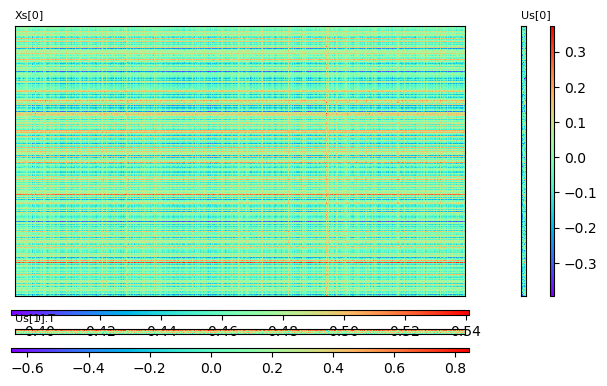

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


<Figure size 640x480 with 0 Axes>

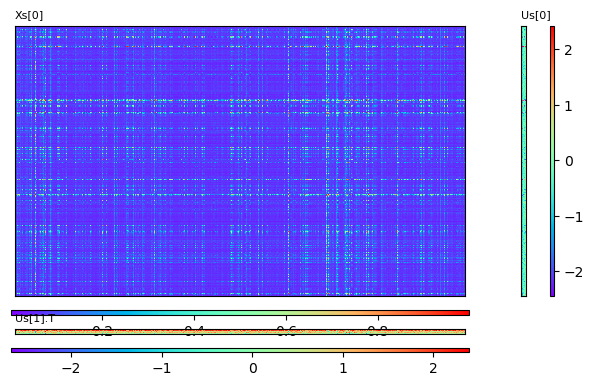

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


<Figure size 640x480 with 0 Axes>

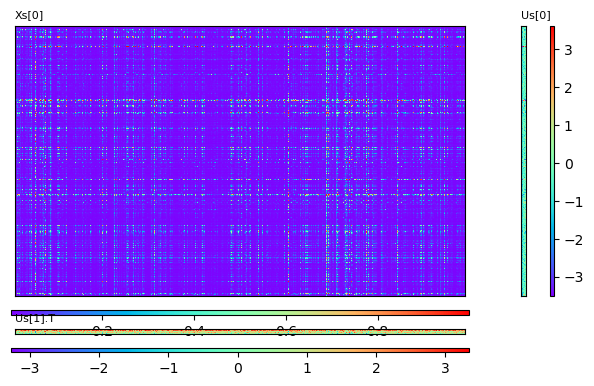

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


<Figure size 640x480 with 0 Axes>

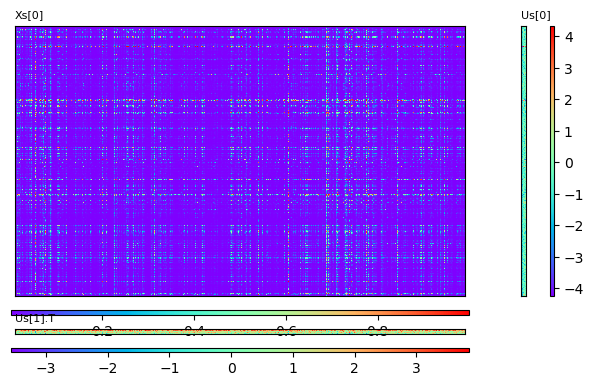

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


<Figure size 640x480 with 0 Axes>

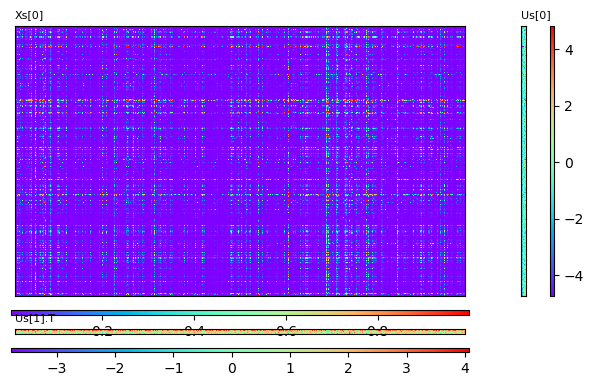

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


<Figure size 640x480 with 0 Axes>

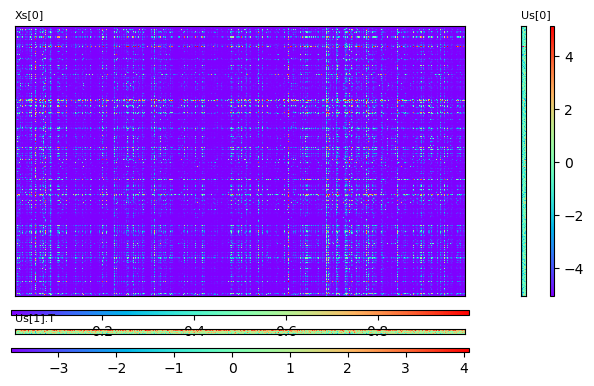

None
[W] Stopped in advance: Reach maximum iteration


<Figure size 640x480 with 0 Axes>

In [9]:
from models import CMF

k = 5
alpha = [0.33]
Ws = 'mask'
link = ['logistic', 'logistic', 'logistic']
lr = 0.1
reg = 0.1
tol = 0.0
max_iter = 50
init_method = 'normal'
seed = 2024

factors = [[0, 1], [0, 2], [3, 1]]
Xs_train = [s0.X_train, s1.X_train, s2.X_train]
Xs_val = [s0.X_val, s1.X_val, s2.X_val]
Xs_test = [s0.X_test, s1.X_test, s2.X_test]

model = CMF(k=k, alpha=alpha, Ws=Ws, link=link, lr=lr, reg=reg, tol=tol, max_iter=max_iter, init_method=init_method, seed=seed)
model.fit(Xs_train=[s0.X_train], factors=[[0, 1]], Xs_val=[s0.X_val], Xs_test=[s0.X_test], task='prediction', verbose=False, display=False)